# Watershed Segmentation 

There is a PlantCV function is based on code contributed by Suxing Liu, Arkansas State University.
For more information see [https://github.com/lsx1980/Leaf_count](https://github.com/lsx1980/Leaf_count).
This function uses the watershed algorithm to detect boundary of objects.
Needs a mask file which specifies area which is object is white, and background is black.
Requires cv2 version 3.0+

In [1]:
from plantcv import plantcv as pcv


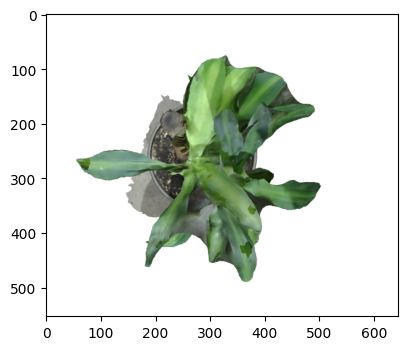

In [2]:
class options:
    def __init__(self):
        self.image = "./img/topShot.png"
        self.debug = "plot"
        self.writeimg= False 
        self.outdir = "."
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 

img, path, filename = pcv.readimage(filename=args.image)


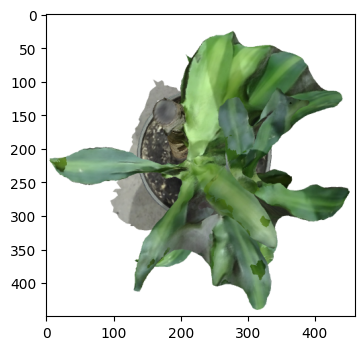

In [5]:
# Crop the image down to focus on just one plant 
crop_img = img[50:500,50:510]
# Print it out to see 
pcv.plot_image(crop_img)


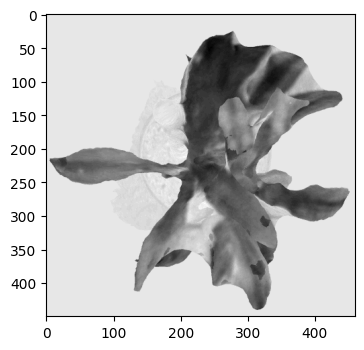

In [6]:
# Convert image from RGB color space to LAB and keep only the 
# green-magenta channel 

# Inputs:
#    rgb_img = image object, RGB color space
#    channel = color subchannel ('l' = lightness, 'a' = green-magenta , 'b' = blue-yellow)

a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')


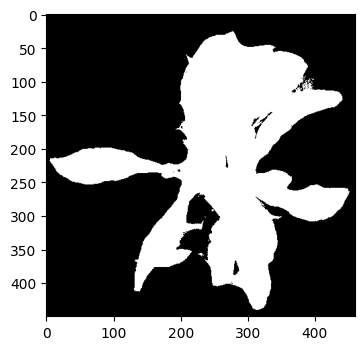

In [10]:
# Set a binary threshold on the image 

# Inputs:
#    gray_img    = img object, grayscale
#    threshold   = threshold value (0-255)
#    max_value   = value to apply above threshold (usually 255 = white)
#    object_type = light or dark
#       - If object is light then standard thresholding is done
#       - If object is dark then inverse thresholding is done

img_binary = pcv.threshold.binary(gray_img=a, threshold=120,max_value=255, object_type='dark')


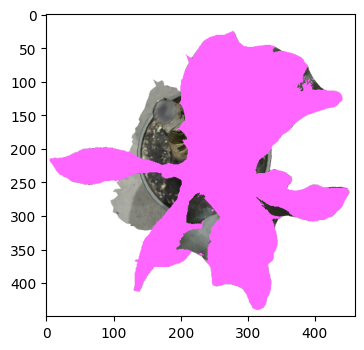

In [11]:
# Find objects

# Inputs:
#    img  = image that the objects will be overlayed
#    mask = what is used for object detection

id_objects, obj_hierarchy = pcv.find_objects(img=crop_img, mask=img_binary)


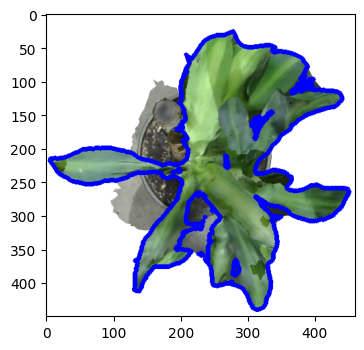

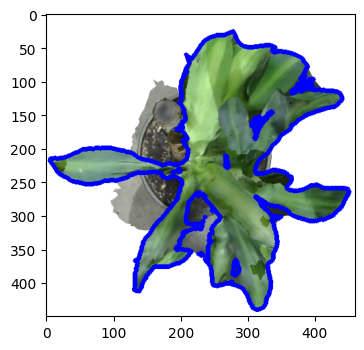

In [12]:
# Combine objects 

# Inputs:
#   img       = RGB or grayscale image data for plotting 
#   contours  = Contour list 
#   hierarchy = Contour hierarchy array 

obj, mask = pcv.object_composition(img=crop_img, contours=id_objects, hierarchy=obj_hierarchy)


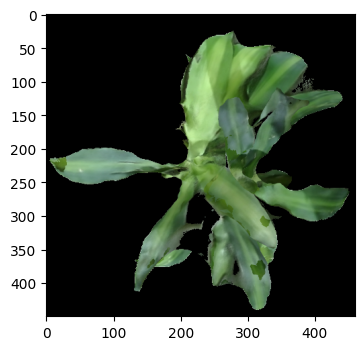

In [13]:
# Appy mask

# Inputs:
#   img        = RGB or grayscale image data 
#   mask       = Binary mask image data 
#   mask_color = 'white' or 'black' 

masked = pcv.apply_mask(img=crop_img, mask=mask, mask_color="black")


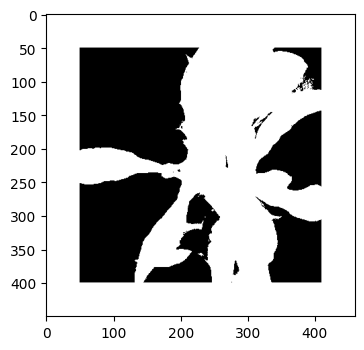

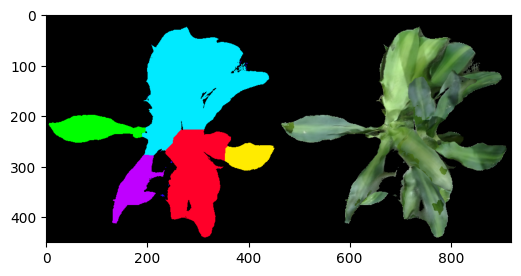

In [19]:
# Use watershed segmentation 

# Inputs:
#   rgb_img  = RGB image data 
#   mask     = Binary image, single channel, object in white and background black
#   distance = Minimum distance of local maximum, lower values are more sensitive, 
#              and segments more objects (default: 10)
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)


analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=mask, distance=50, label="default")



In [30]:
# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename='segmentation_tutorial_results.txt')


To view and/or download the text file output (saved in JSON format)...
1) To see the text file with data that got saved out, click “File” tab in top left corner.
2) Click “Open…”
3) Open the file named “segmentation_tutorial_results.txt”

Check out documentation on how to [convert JSON](https://plantcv.readthedocs.io/en/latest/tools/#convert-output-json-data-files-to-csv-tables) format output into table formatted output. Depending on the analysis steps a PlantCV user may have two CSV files (single value traits and multivalue traits). 
